In [22]:
import numpy as np
import matplotlib.pyplot as plt

from hypothesis_tests import NEWCORR
from power import LINEAR, NOISE_LEVELS

In [23]:
noise_values = np.arange(NOISE_LEVELS + 1) / NOISE_LEVELS

In [25]:
powers = np.load(f"results/power/{LINEAR}_{NEWCORR}_powers.npy")

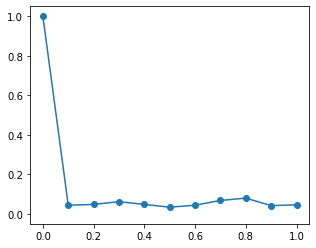

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

ax.plot(noise_values, powers, marker="o")
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
plt.show()